<a href="https://colab.research.google.com/github/AlvinChiew/MachineLearning/blob/main/Sklearn_Classifier_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Modules

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
plt.style.use('ggplot')

# Load and Pre-Process data

In [2]:
data_obj = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data_obj.data, data_obj.target,
                                                    stratify=data_obj.target, 
                                                    random_state=0)

# Modeling

In [3]:
# storage of results from multiple k-value (predict with k amount of neighbouring data point)
train_acc = []
test_acc = []

k_range = range(1,11)       # experiment k-value from 1 to 10; 

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train,y_train))
    test_acc.append(model.score(X_test,y_test))

# Plot Result

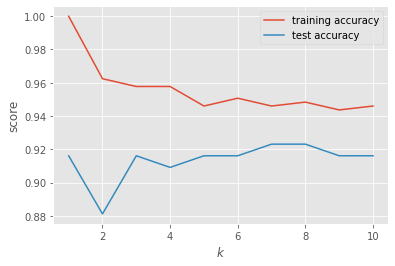

In [6]:
plt.plot(k_range, train_acc)
plt.plot(k_range, test_acc)
plt.xlabel(r'$k$')
plt.ylabel('score')
plt.legend(['training accuracy', 'test accuracy'])
# pl.savefig('result.png')
plt.show()

# Best : k=7